## Chapter 4: von Neumann Entropy and Evolution of State Vector

In [42]:
import numpy as np
from qiskit import *
import math as m
from scipy import linalg as la
%matplotlib inline

In [43]:
# Compute Shannon Entropy of random variable for six sided die
SH = -m.log2(1/6)
print(SH)

2.584962500721156


## von Neumann Entropy ##

The Shannon entropy measure uncertainty related to a *classical probability distribution*. The density operators were a way of describing possible states of a quantum system, or equivalently possible outcomes of measurements, in a way very similar to probability distributions. The **von Neumann Entropy** of a quantum state $\rho$ (where $\rho$ is a density matrix) is defined to be

\begin{align}
S(\rho) = -Tr(\rho \log(\rho)).
\end{align}

Here, the lograithm is now a *matrix logarithm*, which is also taken to be base $2$. If we let $\{\lambda_k\}$ be the complete set of *eigenvalues* of the matrix $\rho$, then we can also define the von Neumann entropy as

\begin{align}
S(\rho) = -\sum_k \lambda_k \log(\lambda_k). 
\end{align}

The logarithm of a matrix, like exponentials and trigonometric functions of matrices, can be defined in terms of a power series. Assuming $||A-I|| < 1$, then the following power series is convergent and defines the lograithm of a matrix,

\begin{align}
\log(A) &= \sum_{k=1}^{\infty} (-1)^{k+1}\frac{(A-I)^k}{k} \\
&= (A-I) - \frac{(A-I)^2}{2} + \frac{(A-I)^3}{3} \cdots. 
\end{align}

Matrix logarithms can be computed in Python using `scipy.linalg.logm()`. We have already imported `linalg` as `la` from SciPy. Let's look at an example. Take the matrix

\begin{align}
\rho &= \frac{1}{3} |l\rangle \langle l| + \frac{2}{3}|0\rangle \langle 0| \\
&=\begin{pmatrix}
5/6 & 1/6 \\
1/6 & 1/6
\end{pmatrix}.
\end{align}

In [44]:
rho = np.matrix([[5/6, 1/6],
                 [1/6, 1/6]])

la.logm(rho)/la.logm(np.matrix([[2]]))

array([[-0.34306481,  0.62094884],
       [ 0.62094884, -2.82686019]])

The von Neumann entropy using the trace of this matrix:

In [45]:
S = -np.matrix.trace(rho*la.logm(rho)/la.logm(np.matrix([[2]])))
print(S)

[[0.55004776]]


This is a  1×1  matrix, i.e. a scalar value, as expected. Let's define a function for density matrices that computes the von Neumann entropy.

In [46]:
def von_neumann_entropy(rho):
    import numpy as np
    from scipy import linalg as la
    R = rho*(la.logm(rho)/la.logm(np.matrix([[2]])))
    S = -np.matrix.trace(R)
    return(S)

Test the function on the matrix rho

In [47]:
von_neumann_entropy(rho)

matrix([[0.55004776]])

That appears to be correct.Next example, suppose we have a composite system with density operator given by 

\begin{align}
\rho = \rho_1 \otimes \rho_2
\end{align}

where 

\begin{align}
\rho_1 &= 
\begin{pmatrix}
5/6 & 1/6 \\
1/6 & 1/6
\end{pmatrix}\\
\rho_2 &=
\begin{pmatrix}
1/2 & 0 \\
0 & 1/2
\end{pmatrix}.
\end{align}

Let's compute $S(\rho)$ using Python. First we compute the tensor product of the matrices using the `np.kron()` function in NumPy. 

In [48]:
rho1 = np.matrix([[5/6, 1/6],
                  [1/6, 1/6]])

rho2 = np.matrix([[1/2, 0],
                  [0, 1/2]])

rho3 = np.kron(rho1, rho2)

print(rho)

[[0.83333333 0.16666667]
 [0.16666667 0.16666667]]


Apply our function von_neumann_entropy() to this matrix.

In [49]:
von_neumann_entropy(rho3)

matrix([[1.55004776]])

Define a function to compute the von Neumann entropy using the eigenvalues of the density matrix.

In [50]:
def vn_eig_entropy(rho):
    import numpy as np
    from scipy import linalg as la
    import math as m
    EV = la.eigvals(rho)
    
    # Drop zero eigenvalues so that log is defined
    my_list = [x for x in EV.tolist() if x]
    EV = np.array(my_list)
    
    log2_EV = np.matrix(np.log2(EV))
    EV = np.matrix(EV)
    S = -np.dot(EV, log2_EV.H)
    return(S)

In [51]:
vn_eig_entropy(rho3)

matrix([[1.55004776-0.j]])

As we see, using the eigenvalue version, we do get the same answer. Let's look at one more example. Take

\begin{align}
\rho_{GHZ} = \frac{1}{3}|000\rangle \langle 000| + \frac{2}{3}|111\rangle \langle 111|.
\end{align}

Let's compute the von Neumann entropy of this density matrix based on the GHZ like state $\frac{1}{3}|000\rangle + \frac{2}{3}|111\rangle$ in Python.

In [52]:
u = np.matrix([[1],
               [0]])

d = np.matrix([[0],
               [1]])

uuu = np.kron(u, np.kron(u,u))

ddd = np.kron(d, np.kron(d,d))

GHZ = np.dot(uuu, uuu.H)/3 + 2*np.dot(ddd, ddd.H)/3

print(GHZ)

[[0.33333333 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.66666667]]


In [53]:
von_neumann_entropy(GHZ)

C:\Users\santagan\Anaconda3\lib\site-packages\scipy\linalg\_matfuncs_inv_ssq.py:829: LogmExactlySingularWarning: The logm input matrix is exactly singular.
  warnings.warn(exact_singularity_msg, LogmExactlySingularWarning)


matrix([[0.91829583]])

In [54]:
vn_eig_entropy(GHZ)

matrix([[0.91829583-0.j]])

Finally, let's generate a random density matrix $\rho$ using the Qiskit function `random_density_matrix()`. This function's first argument is the dimension of the desired density matrix, which need not be a power of two. However, in the context of quantum circuits with qubits, it is important we make this restriction manually. There are of course more general systems involving things such as "*qudits*" which might yield arbitrary dimensional density matrices. 

## Pure States, Mixed States, and von Neumann Entropy

For pure states $\rho$, the density matrix is **idempotent**, meaning $\rho^2 = \rho$. In this case the von Neumann entropy will vanish. To see this, let's take a one parameter family of density matrices with parameter $p$, 

\begin{align}
\rho(p) &= p|0\rangle \langle 0| + (1-p)|1\rangle \langle 1| \\
&= p
\begin{pmatrix}
1 & 0 \\
0 & 0
\end{pmatrix} + 
(1-p)
\begin{pmatrix}
0 & 0 \\
0 & 1
\end{pmatrix} \\
&= 
\begin{pmatrix}
p & 0 \\
0 & 1-p
\end{pmatrix}.
\end{align}

The definition of von Neumann entropy then tells us that 

\begin{align}
S(\rho(p)) = -(p\log(p) + (1-p)\log(1-p)).
\end{align}

Set $0 \log(0) \equiv 0$. For $p = 0$ this becomes

\begin{align}
S(\rho(0)) = \log(1) = 0, 
\end{align}

and for $p = 1$ this becomes

\begin{align}
S(\rho(1)) = \log(1) = 0.
\end{align}

Notice, this corresponds exactly to the two pure states

\begin{align}
|0\rangle \langle 0| &=
\begin{pmatrix}
1 & 0 \\
0 & 0
\end{pmatrix} \\
|1\rangle \langle 1| &=
\begin{pmatrix}
0 & 0 \\
0 & 1
\end{pmatrix}.
\end{align}

For any value of $0 < p < 1$ we have a nonzero value for the von Neumann entropy. We can plot these values as follows. 

In [55]:
# Spin-up
u = np.matrix([[1],
               [0]])

# Spin-down
d = np.matrix([[0],
               [1]])

# Pure state |0><0|
P11 = np.dot(u, u.H)

# Pure state |1><1|
P22 = np.dot(d, d.H)

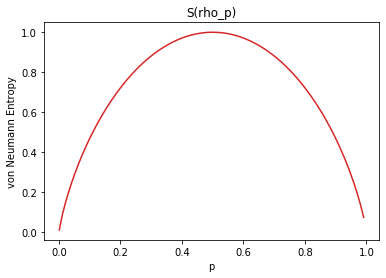

In [56]:
import matplotlib.pyplot as plt

p = np.arange(0.001, 1., 0.01)

# create list of von Neumann entropies
vn_y = list()
for value in p:
    rho_p = value*P11 + (1-value)*(P22)
    vn_y.append(von_neumann_entropy(rho_p))

# convert list of matrices to list of numbers for plotting
y = list()
for value in vn_y:
    y.append(value.tolist()[0][0])

# plot p vs. S(rho_p)
plt.xlabel('p')
plt.ylabel('von Neumann Entropy')
plt.title('S(rho_p)')
plt.plot(p, y, color='tab:red')
plt.show()

A comparison of the above von Neumann plot to the classical Shannon entropy of 

\begin{align}
H(p, 1-p) = -(p\log(p) + (1-p)\log(1-p))
\end{align}

show that they are in fact the same. 

Following is a slightly different example of a one parameter family of density matrices,

\begin{align}
\rho(p) &= p(|0\rangle \langle 0|+|1\rangle \langle 1|) + (1-p) \frac{(|0\rangle + |1\rangle )(\langle 0| + \langle 1|)}{2}\\
&= \frac{p}{2}
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix} + \frac{(1-p)}{2}
\begin{pmatrix}
1 & 1 \\
1 & 1
\end{pmatrix} \\
&= 
\begin{pmatrix}
p/2 & 0 \\
0 & p/2
\end{pmatrix} + 
\begin{pmatrix}
(1-p)/2 & (1-p)/2 \\
(1-p)/2 & (1-p)/2
\end{pmatrix}.
\end{align}

In [57]:
# Define spin-up
u = np.matrix([[1],
               [0]])

# Define spin-down
d = np.matrix([[0],
               [1]])

# Define the pure state |0><0|
P11 = np.dot(u, u.H)

# Define the pure state |0><1|
P12 = np.dot(u, d.H)

# Define the pure state |1><0|
P21 = np.dot(d, u.H)

# Define the pure state |1><1|
P22 = np.dot(d, d.H)

# Define the mixed state |0><0| + |1><1|
I = (P11+P22)/2

# Define the pure state |0><0|+|0><1|+|1><0|+|1><1|
D = (P11+P12+P21+P22)/2

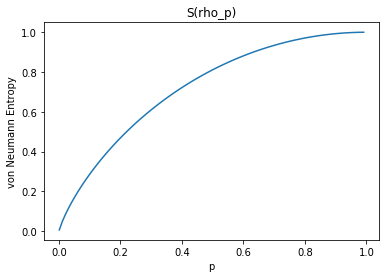

In [58]:
p = np.arange(0.001, 1., 0.01)

# Create list of von Neumann entropies
vn_y = list()
for value in p:
    rho = value*I + (1-value)*(D)
    vn_y.append(von_neumann_entropy(rho))

# convert list of matrices to list of numbers for plotting
y = list()
for value in vn_y:
    y.append(value.tolist()[0][0])

    
# plot p vs. S(rho_p)
plt.xlabel('p')
plt.ylabel('von Neumann Entropy')
plt.title('S(rho_p)')
plt.plot(p, y, color='tab:blue')
plt.show()

Please note how one side of the curve corresponds to the *pure state*


\begin{align}
|\psi\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}} = |+\rangle,
\end{align}

since 

\begin{align}
|+\rangle \langle +| = 
\frac{1}{2}
\begin{pmatrix}
1 & 1 \\
1 & 1
\end{pmatrix}.
\end{align}

The opposite side of the curve (to the far right) corresponds to the *mixed state*

\begin{align}
\frac{|0\rangle \langle 0|}{2} + \frac{|1\rangle \langle 1|}{2} = 
\begin{pmatrix}
1/2 & 0 \\
0 & 1/2
\end{pmatrix}.
\end{align}

We can see as the system evolves from pure to mixed the von Neumann entropy approches $S(\rho(1)) = 1$. In general, for finite systems the von Neumann entropy $S(\rho)$ encodes the departure of the system from a pure state, and described the degree of mixing in the state. For zero mixing (pure states), the von Neumann entropy is always zero. 

## GHZ-state
The following code creates a quantum circuit that prepares a GHZ-state, and prints the state vector as a column (ket) vector.

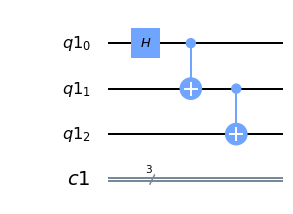

In [59]:
from qiskit import *
import numpy as np
%matplotlib inline

qr = QuantumRegister(3)
cr = ClassicalRegister(3)
GHZ = QuantumCircuit(qr, cr)

GHZ.h(0)
GHZ.cx(0,1)
GHZ.cx(1,2)
GHZ.draw(output='mpl')

In [60]:
backend = Aer.get_backend('statevector_simulator') 
GHZ_state = execute(GHZ,backend).result().get_statevector()
print(np.matrix(GHZ_state).H)

[[0.70710678-0.j]
 [0.        -0.j]
 [0.        -0.j]
 [0.        -0.j]
 [0.        -0.j]
 [0.        -0.j]
 [0.        -0.j]
 [0.70710678-0.j]]


In [61]:
from qiskit.quantum_info import Statevector
psi = Statevector(GHZ_state)
print(psi)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


The `DensityMatrix()` function is used from Qiskit by passing it the `GHZ_state` ket-vector we defined above.

In [62]:
from qiskit.quantum_info import DensityMatrix
D = DensityMatrix(GHZ_state)
print(D)

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0.5+0.j]],
              dims=(2, 2, 2))


The von Neumann entropy can now be calculated using the Qiskit `entropy()` function. This cane be passed either by the `Statevector` or the `DensityMatrix`. In the second case, we get effectively zero entropy, in the first we get exactly zero. This makes sense because the state is a pure state and the density matrix is computed as $D = |\psi\rangle \langle \psi|$. 

In [63]:
from qiskit.quantum_info import entropy
vn_entropy1 = entropy(psi, base=2)
vn_entropy2 = entropy(D, base=2)
print(vn_entropy1)

0


In [64]:
print(vn_entropy2)

1.6017132519074586e-16


In [65]:
from qiskit.quantum_info import random_density_matrix
rho = random_density_matrix(8, rank=None, method='Hilbert-Schmidt', seed=None)
print(rho)

DensityMatrix([[ 0.08054469+0.j        ,  0.00378534-0.01512447j,
                 0.00550948+0.03754271j,  0.02774094+0.00635299j,
                -0.00767342-0.0592505j ,  0.03333562-0.01379761j,
                -0.03375188+0.03520552j, -0.02217007+0.00118471j],
               [ 0.00378534+0.01512447j,  0.09931229+0.j        ,
                -0.00188157+0.02163789j,  0.02974469+0.02266381j,
                -0.01292592+0.02210988j,  0.07337398-0.02819207j,
                 0.02696688-0.01628446j,  0.03650342+0.05754092j],
               [ 0.00550948-0.03754271j, -0.00188157-0.02163789j,
                 0.12163314+0.j        ,  0.00577139-0.03222451j,
                -0.04212854-0.03942353j, -0.01561449-0.0379997j ,
                 0.00196646+0.02940909j,  0.01711995-0.00919092j],
               [ 0.02774094-0.00635299j,  0.02974469-0.02266381j,
                 0.00577139+0.03222451j,  0.16309058+0.j        ,
                 0.01323722-0.00970595j, -0.00127357-0.05265801j,
       

Compute the entropy using the Qiskit `entropy()` function. 

In [66]:
entropy(rho, base=2)

2.3016750485394146

Plot the entropy of the system that evolved from the state given by the density matrix $D$ of the GHZ-state to the system described by the density matrix $\rho$. 

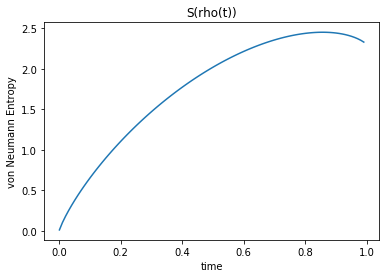

In [67]:
time = np.arange(0.001, 1., 0.01)

vn_entropy = list()
for t in time:
    vn_entropy.append(entropy(D, base=2)*t + entropy(rho, base=2)*(1-t))

# Create list of von Neumann entropies
vn_y = list()
for value in p:
    M = value*rho + (1-value)*(D)
    vn_y.append(entropy(M))

# convert list of matrices to list of numbers for plotting
# y = list()
# for value in vn_y:
#    y.append(value.tolist()[0][0])

    
# plot p vs. S(rho_p)
plt.xlabel('time')
plt.ylabel('von Neumann Entropy')
plt.title('S(rho(t))')
plt.plot(p, vn_y, color='tab:blue')
plt.show()

Noticeable is the maximum which is actually at an intermediate point in time, just before the final mixed state is achieved. Generally speaking, entropy has a tendency to increase over time. However, in effectively "closed" quantum systems where substantial control can be exercised, the entropy can be reduced down to a lower level.

## Properties of von Neumann Entropy

1. $S(\rho) = 0$ if and only if $\rho$ is a pure state.
2. For $dim(\mathbb{H}) = N$ the dimension of the Hilbert space, $S(\rho) = \log(N)$ gives the maximum value of $S(\rho)$ for a *maximally mixed state*. 
3. $S(\rho)$ is invariant under basis change, i.e. $S(\rho) = S(U \rho U^{\dagger})$ for any unitary matrix $U$. 
4. For a set of numbers $\{\lambda_k\}$ such that $\sum_k \lambda_k =1$ and $\lambda_k >0$, and for a corresponding collection of density matrices $\{\rho_k\}$ we have

\begin{align}
S\left(\sum_k \lambda_k \rho_k \right) \geq \sum_k \lambda_k S(\rho_k), 
\end{align}

making the von Neumann entropy *concave*.

5. For a set of numbers as above, $S(\rho)$ satisfies

\begin{align}
S\left(\sum_k \lambda_k \rho_k \right) \leq \sum_k \lambda_k S(\rho_k) - \sum_k \lambda_k \log(\lambda_k), 
\end{align}

and equality is achieved if the $\rho_k$ have orthogonal support. 

6. $S(\rho_{AB}) = S(\rho_A \otimes \rho_B) = S(\rho_A)+S(\rho_B)$ for independent systems $A$ and $B$. 
7. $S(\rho_{ABC})+S(\rho_B) \leq S(\rho_{AB})+S(\rho_{BC})$.
8. $S(\rho_{AC}) \leq S(\rho_A)+S(\rho_C)$.
